In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32


train_path = 'cotton-leaf-train'
valid_path = 'cotton-leaf-test'


In [4]:
# Import the Resnet 50 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
 # useful for getting number of output classes
folders = glob('cotton-leaf-train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
len(folders)

4

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)


In [10]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('cotton-leaf-train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('cotton-leaf-test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute - 10 epochs means a shorter response time

r = model.fit(
    training_set,
    epochs=10,
    verbose=1,
    validation_data=test_set,
)

Epoch 1/10


C:\Users\Uyama\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.3273 - loss: 3.8474 - val_accuracy: 0.5000 - val_loss: 1.3382
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.5252 - loss: 1.1998 - val_accuracy: 0.7222 - val_loss: 0.8272
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5873 - loss: 1.0243 - val_accuracy: 0.6111 - val_loss: 0.8907
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.6012 - loss: 1.0555 - val_accuracy: 0.6667 - val_loss: 0.7710
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.6479 - loss: 0.8689 - val_accuracy: 0.6111 - val_loss: 0.9269
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.6893 - loss: 0.7474 - val_accuracy: 0.7778 - val_loss: 0.7092
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.6942 - loss: 0.7744 - val_accuracy: 0.6111 - val_loss: 0.7038
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.6919 - loss: 0.7544 - val_accuracy: 0.7778 - val_loss: 0.

In [17]:
import matplotlib.pyplot as plt

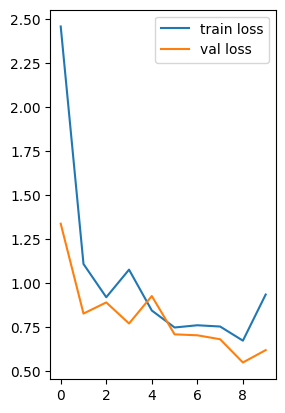

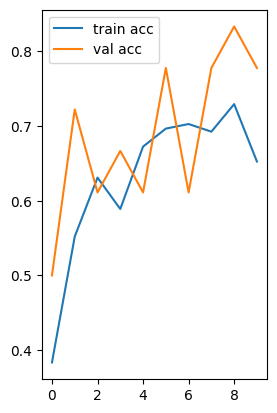

<Figure size 640x480 with 0 Axes>

In [34]:
# plot the loss
plt.subplot(1,2,2)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a keras file


from tensorflow.keras.models import load_model

model.save('cotton-prediction-model.keras')

In [20]:
y_pred = model.predict(test_set)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [21]:
y_pred

array([[1.01634726e-01, 2.17000078e-02, 8.63272130e-01, 1.33931572e-02],
       [1.39582157e-01, 6.26467094e-02, 6.18307054e-01, 1.79464087e-01],
       [1.75841358e-02, 2.03530211e-02, 9.29111242e-01, 3.29516158e-02],
       [1.61152054e-02, 7.99636990e-02, 4.37516440e-03, 8.99545848e-01],
       [4.81707215e-01, 7.81364652e-05, 1.04105123e-03, 5.17173588e-01],
       [7.80566223e-03, 7.84971416e-01, 4.78811422e-03, 2.02434823e-01],
       [9.99889731e-01, 2.07162842e-07, 1.81584091e-05, 9.19359154e-05],
       [4.80005592e-02, 6.93692803e-01, 1.21054985e-03, 2.57096052e-01],
       [1.17069595e-02, 3.65622610e-01, 7.29909260e-03, 6.15371346e-01],
       [2.33471626e-03, 9.30302441e-01, 2.82008605e-05, 6.73345327e-02],
       [3.13111059e-02, 1.13022230e-04, 9.68338728e-01, 2.37065324e-04],
       [3.01771914e-03, 1.08611013e-04, 9.53132749e-01, 4.37409319e-02],
       [4.59668506e-03, 9.42280412e-01, 3.76509596e-03, 4.93578538e-02],
       [2.58117146e-03, 9.77864206e-01, 2.13794337e

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 2, 2, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('cotton-prediction-model.keras')

In [26]:
# from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img